<a href="https://colab.research.google.com/github/rakelup/EPICLIN2021/blob/main/IntroPythonEpiclin2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Formation EPICLIN 2021 - Introduction à Python pour l’analyse de données de santé

Marseille 8 juin 2021

Raquel Urena, Jean Charles Dufour, Sesstim, Université Aix Marseille

**Objectifs pédagogiques :**

Se familiariser avec le pipeline de travail de Python pour l'analyse des données médicales :

1. Apprendre comment effectuer la préparation et le prétraitement des données avec la bibliothèque **Pandas** : Nettoyage des données, sélections des variables, et conversion de variables catégorielles.
2. Faire une analyse exploratoire des ensembles de données à l'aide des bibliothèques  **Matplotlib et Seaborn**.
3. Réalisation d'une analyse de données basée sur l'apprentissage automatique avec la bibliothèque **Scikit Learn**.

# Diabetes Classifier

Ce programme crée un classificateur pour l'ensemble de données sur le diabète des Indiens Pima - https://www.kaggle.com/uciml/pima-indians-diabetes-database. C'est un problème de classification binaire (2 classes). 
Il y a 768 observations avec 8 variables d'entrée et 1 variable de sortie / cible. Les noms des variables sont les suivants:





- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

##  Importer les bibliothèques 

In [ ]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
SEED = 42


##  Lecture et manipulation de dataframes avec Pandas

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/',force_remount=True)
#df = pd.read_csv('diabetes.csv')

df = pd.read_csv("https://raw.githubusercontent.com/rakelup/EPICLIN2021/master/diabetes.csv", sep=",",error_bad_lines=False)
df.head()



Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

In [ ]:
# aperçu des données
print ('Files     : ', df.shape[0])
print ('Colonnes  : ', df.shape[1])
print ('\nFeatures : \n', df.columns.tolist())
print ('\nValeurs manquantes:  ', df.isnull().sum().values.sum())
print ('\nValeurs unique :  \n', df.nunique())

Files     :  768
Colonnes  :  9

Features : 
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Valeurs manquantes:   0

Valeurs unique :  
 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [ ]:
df.info()
df.isnull().sum()

NameError: ignored

In [ ]:
# voir toutes les colonnes numériques
df.describe()

Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#Trier le data frema
b = df.sort_values('Pregnancies')
b.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            0       97             64  ...                     0.600   25        0
1            0       95             85  ...                     0.247   24        1
2            0       91             68  ...                     0.381   25        0
3            0      120             74  ...                     0.285   26        0
4            0      104             64  ...                     0.510   22        1

[5 rows x 9 columns]

In [ ]:
df[df['BloodPressure'] >70].count() # Filtrage par valeur

Pregnancies                 393
Glucose                     393
BloodPressure               393
SkinThickness               393
Insulin                     393
BMI                         393
DiabetesPedigreeFunction    393
Age                         393
Outcome                     393
dtype: int64

 La distribution de la classe cible est légèrement déséquilibrée 
 «0» = pas de diabète; «1» = diabète


###Conversion des variables categorielles : Get dummies

In [ ]:
df_petit = pd.DataFrame({ 'Country': ['France','Spain','Germany', 'Spain','Germany', 'France'], 'Age': [50,60,40,20,40,30] })


df_petit = pd.get_dummies(df_petit,prefix=['Country'], columns = ['Country'], drop_first=True)
df_petit.head()


Age  Country_Germany  Country_Spain
0   50                0              0
1   60                0              1
2   40                1              0
3   20                0              1
4   40                1              0

###Traitement de valeurs manquantes

In [ ]:


##Valeurs manquantes en Glucose, BloodPressure, SkinThickness, Insulin, BMI
#besoin de remplacer zéro par la médiane, 2 étapes: remplacez 0 par NaN, puis remplacez NaN par la médiane (pour que 0 n'affecte pas la médiane)
# après cette étape, réexécutez la visualisation précédente

df.Glucose.replace(0, np.nan, inplace=True)
df.Glucose.replace(np.nan, df['Glucose'].median(), inplace=True)
df.BloodPressure.replace(0, np.nan, inplace=True)
df.BloodPressure.replace(np.nan, df['BloodPressure'].median(), inplace=True)
df.SkinThickness.replace(0, np.nan, inplace=True)
df.SkinThickness.replace(np.nan, df['SkinThickness'].median(), inplace=True)
df.Insulin.replace(0, np.nan, inplace=True)
df.Insulin.replace(np.nan, df['Insulin'].median(), inplace=True)
df.BMI.replace(0, np.nan, inplace=True)
df.BMI.replace(np.nan, df['BMI'].median(), inplace=True)

## Visualization de données

0    0.651042
1    0.348958
Name: Outcome, dtype: float64


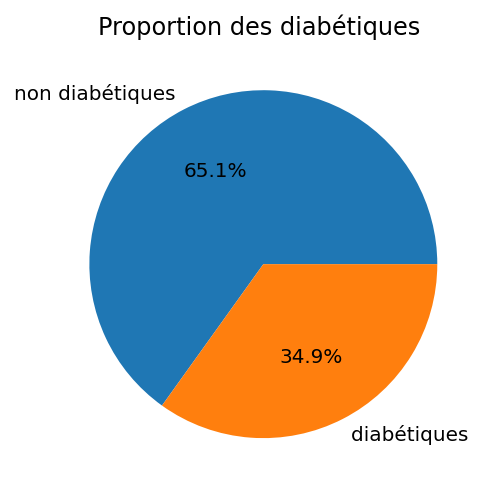

In [ ]:
#value_counts compte le nombre d’éléments  qu'il y a pour chaque valeur

proportion = df['Outcome'].value_counts() / df.Outcome.count()
print (proportion)

label = ['non diabétiques', 'diabétiques ']

plt.pie(proportion,labels = label,autopct='%1.1f%%')

plt.title('Proportion des diabétiques ')
labels=['non diabetes, diabetes']
plt.show()

# https://datatofish.com/pie-chart-matplotlib/

Text(0.5, 1.0, 'Distribution Age')

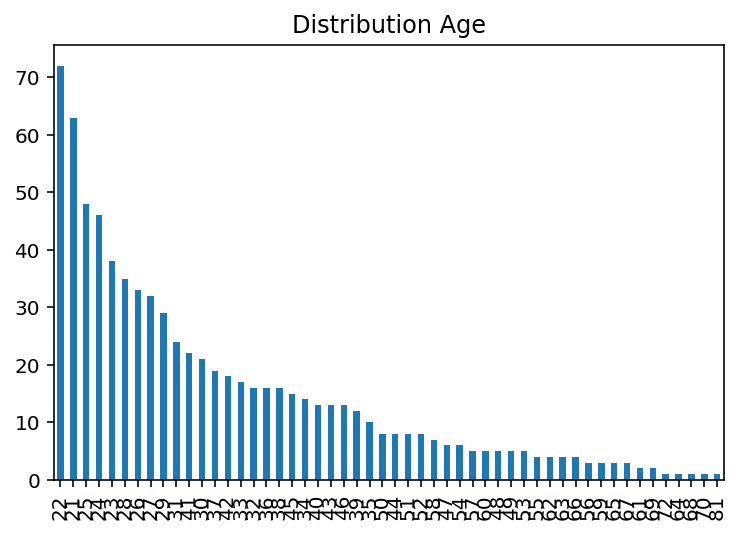

In [ ]:

df['Age'].value_counts().plot(kind='bar').set_title('Distribution Age')

Text(0.5, 1.0, 'Distribution grosseses')

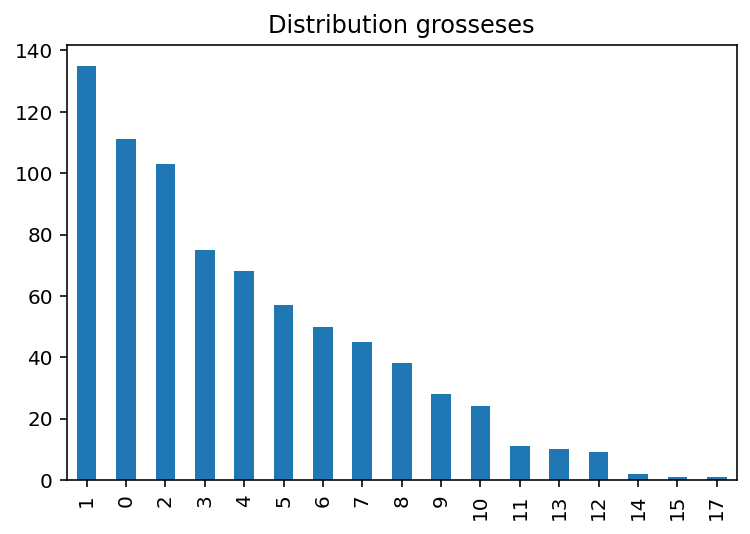

In [ ]:
df['Pregnancies'].value_counts().plot(kind='bar').set_title('Distribution grosseses')

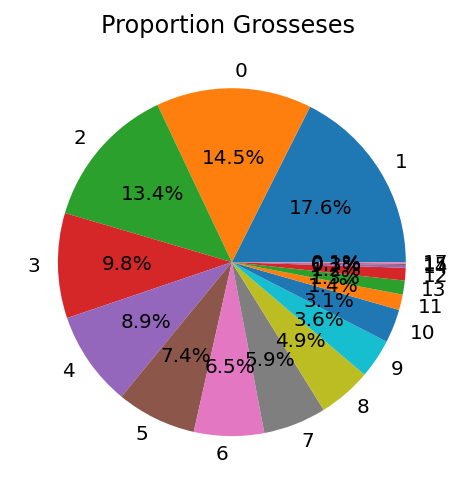

In [ ]:
proportionGrosseses = df.Pregnancies.value_counts() / df.Pregnancies.count()

plt.pie(proportionGrosseses,labels = proportionGrosseses.index,autopct='%1.1f%%')

plt.title('Proportion Grosseses ')

plt.show()

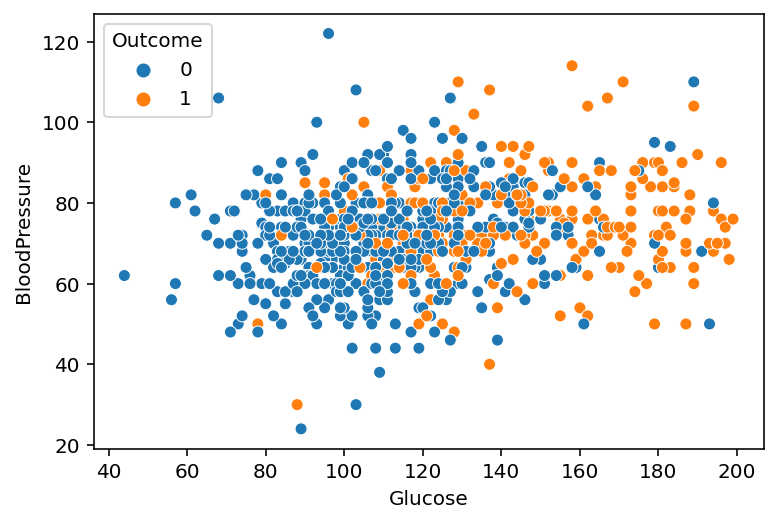

In [ ]:
g =sns.scatterplot(x="Glucose", y="BloodPressure",hue="Outcome", data=df);


###Visualization de distributions de Diabetiques Vs Non-Diabetiques

Exercice : Visualization de la distribution de Glucose, et de la BloodPreasure pour les diabetiques et pour les non diabetiques.

Piste : Pandas df.hist

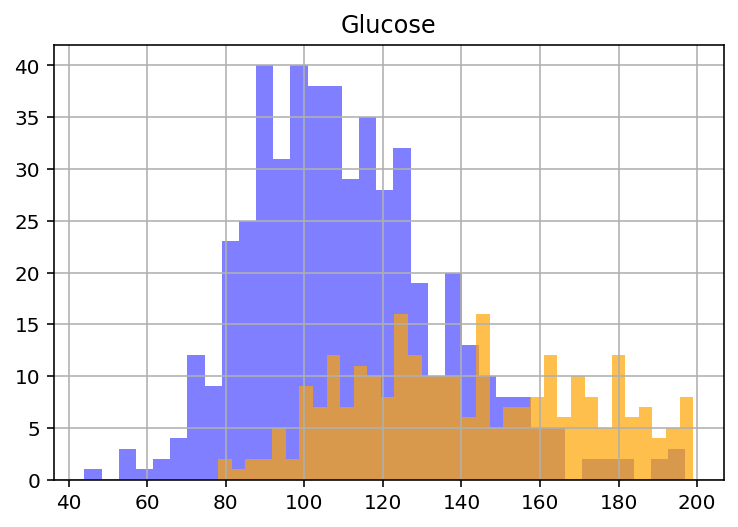

In [ ]:

feature = 'Glucose'
df[df.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5).set_title(feature)
df[df.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7)

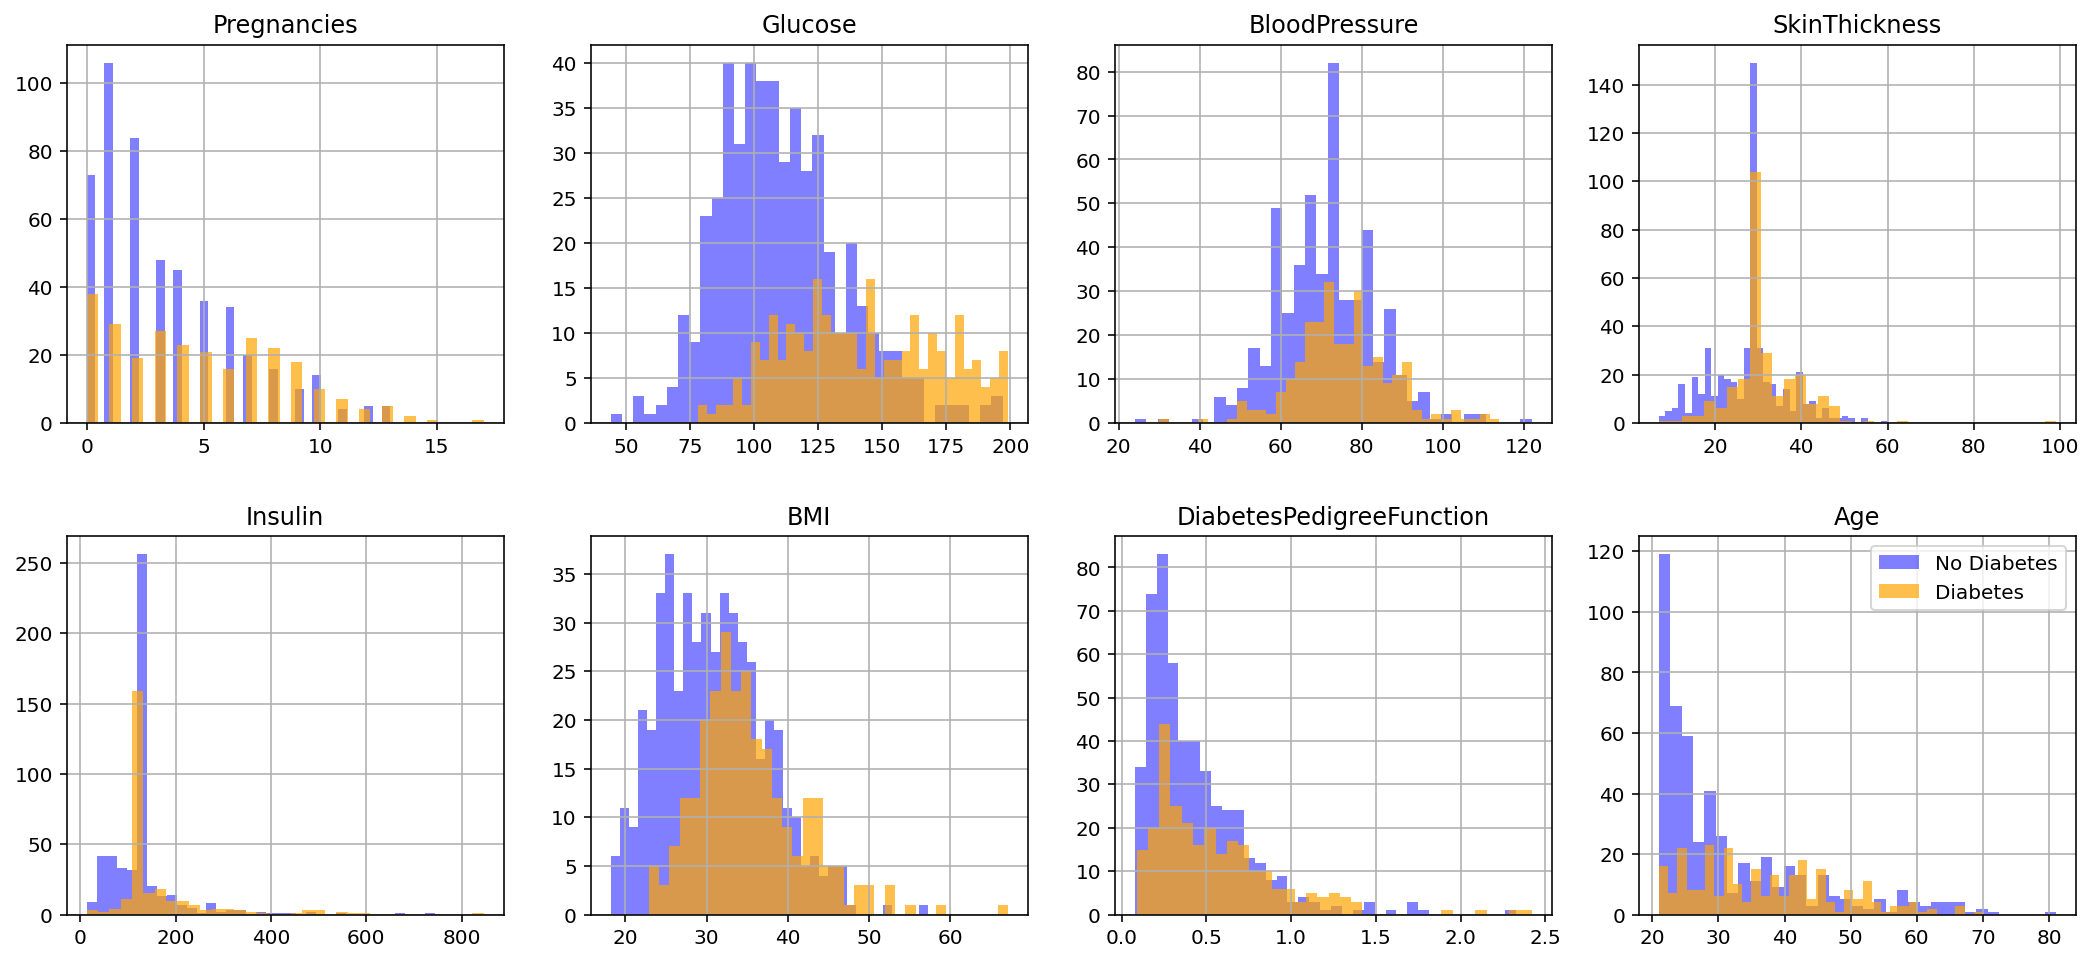

In [ ]:

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
    df[df.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    df[df.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

###Visualization de variables par pair

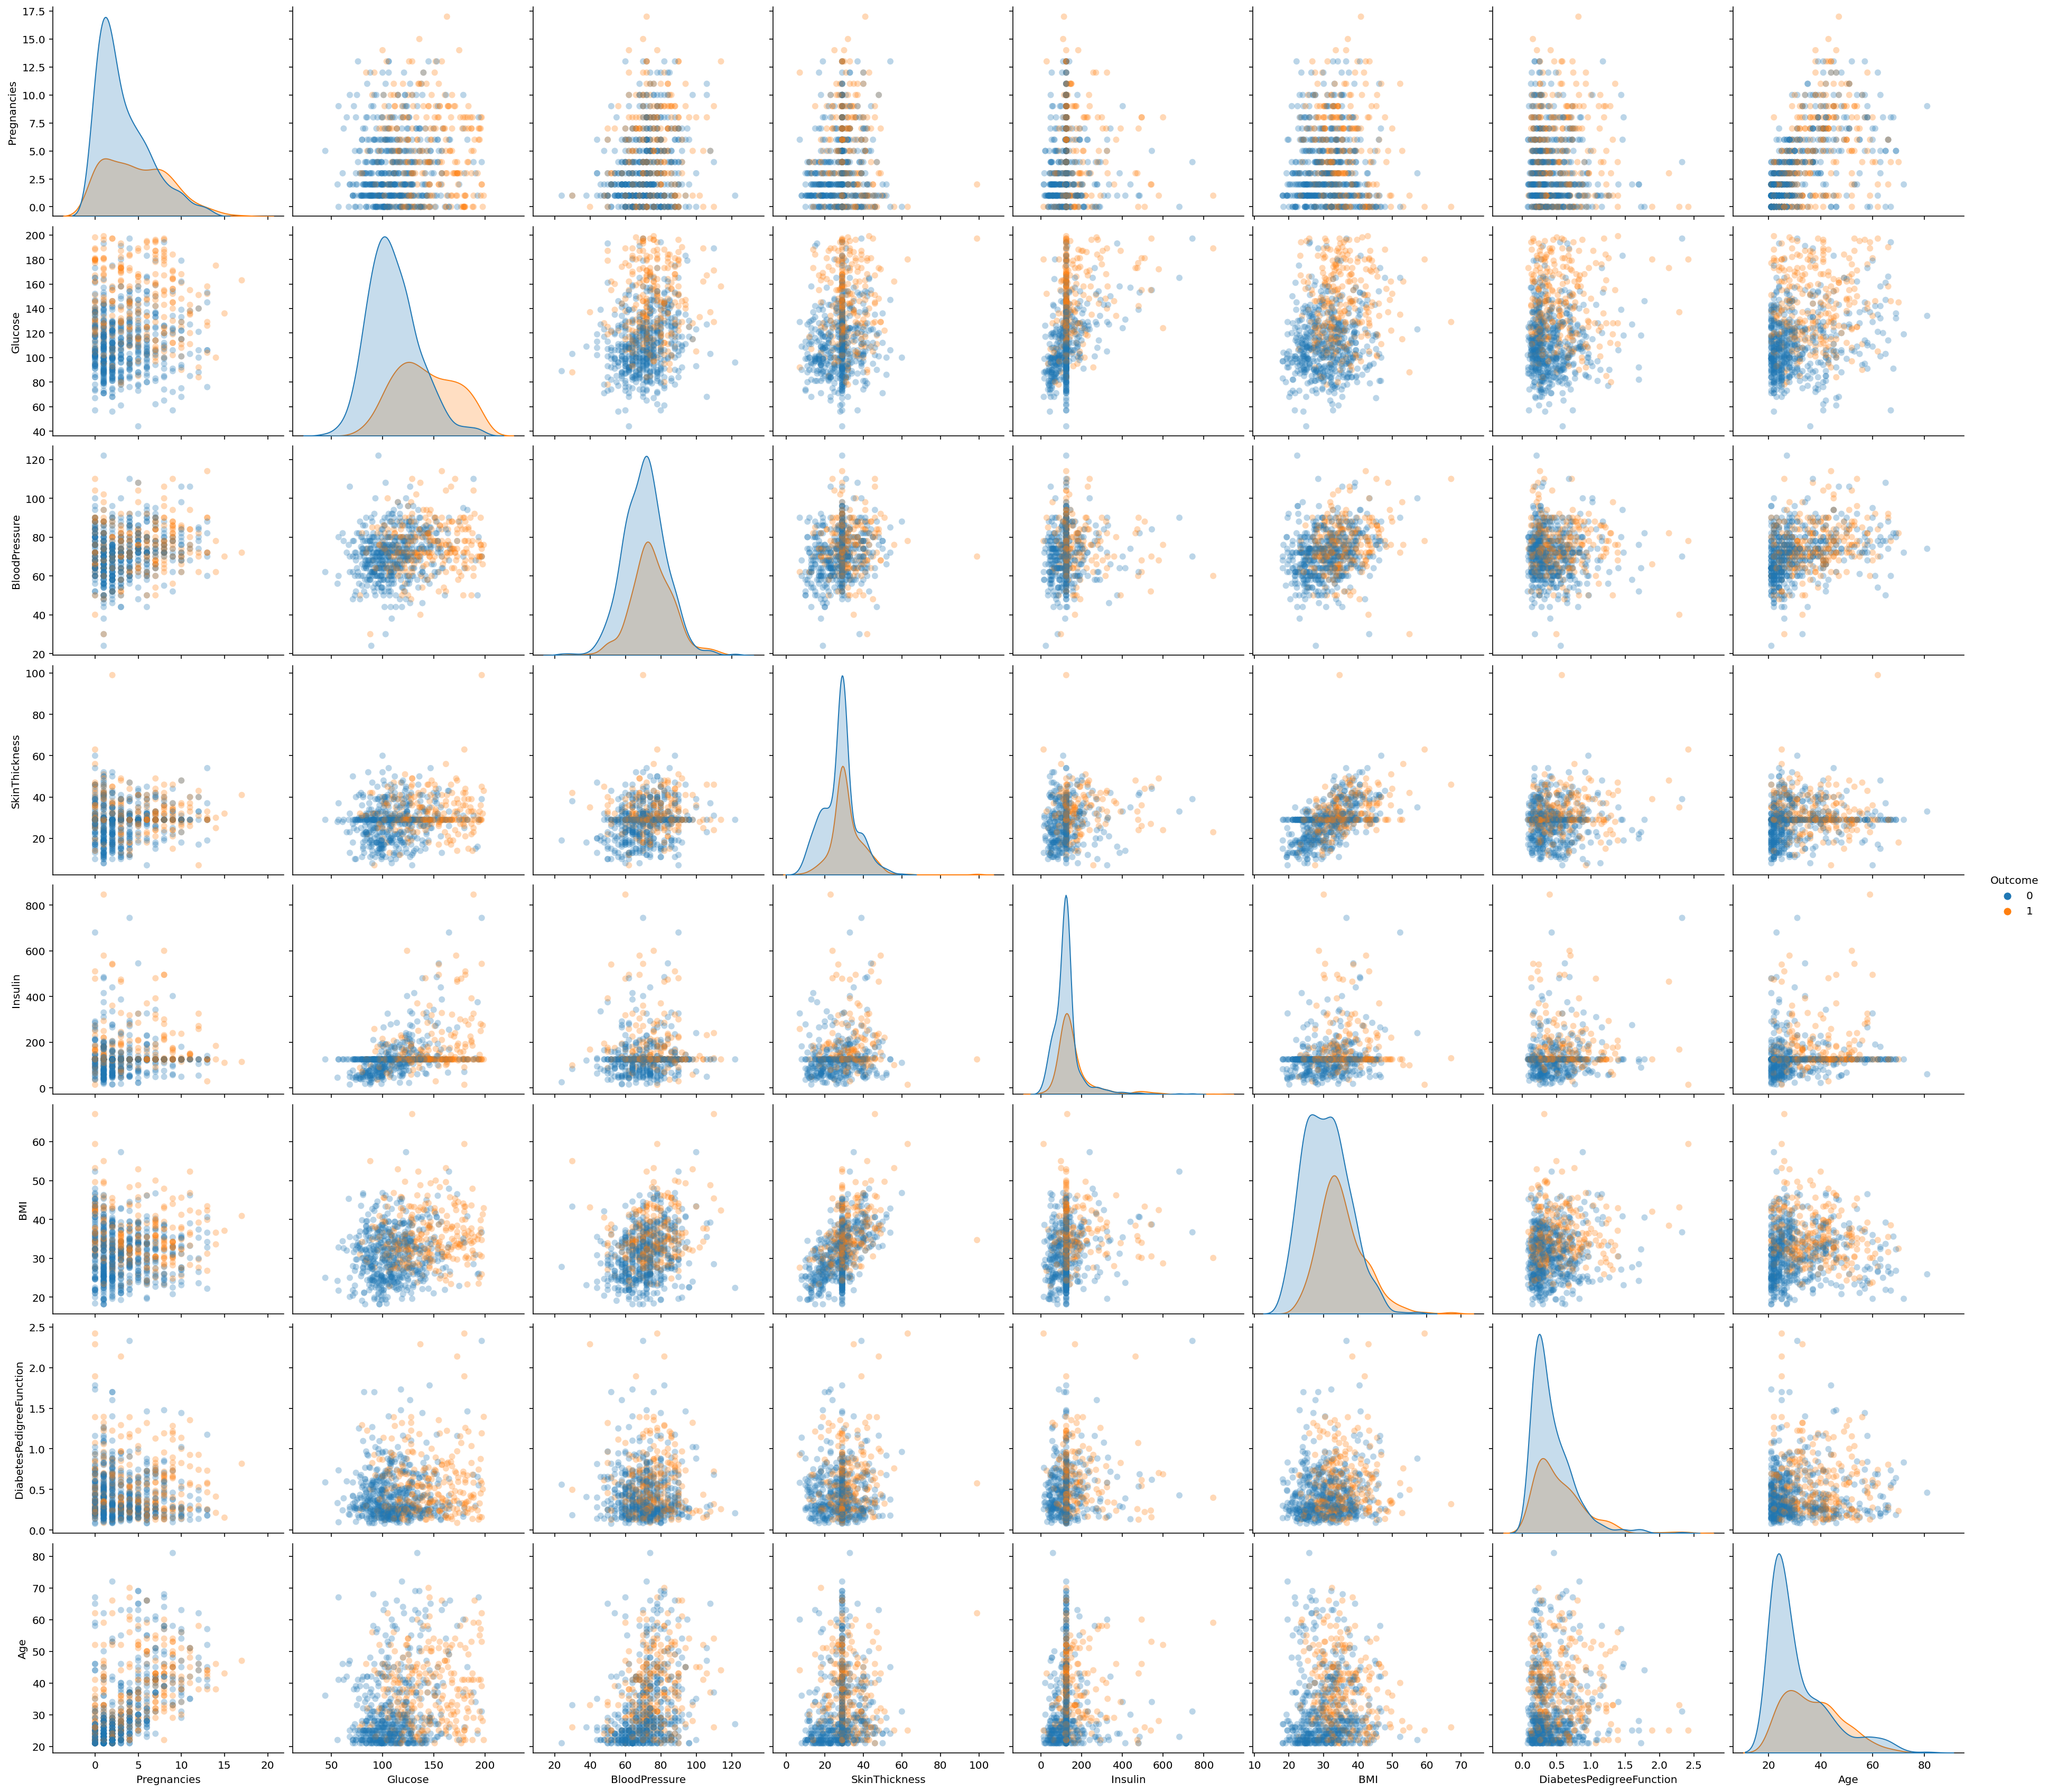

In [ ]:
# Visualization par pairs
sns.pairplot(df, hue='Outcome', plot_kws=dict(alpha=.3, edgecolor='none'), height=3, aspect=1.1)

### Matrix de correlation

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


(9.5, -0.5)

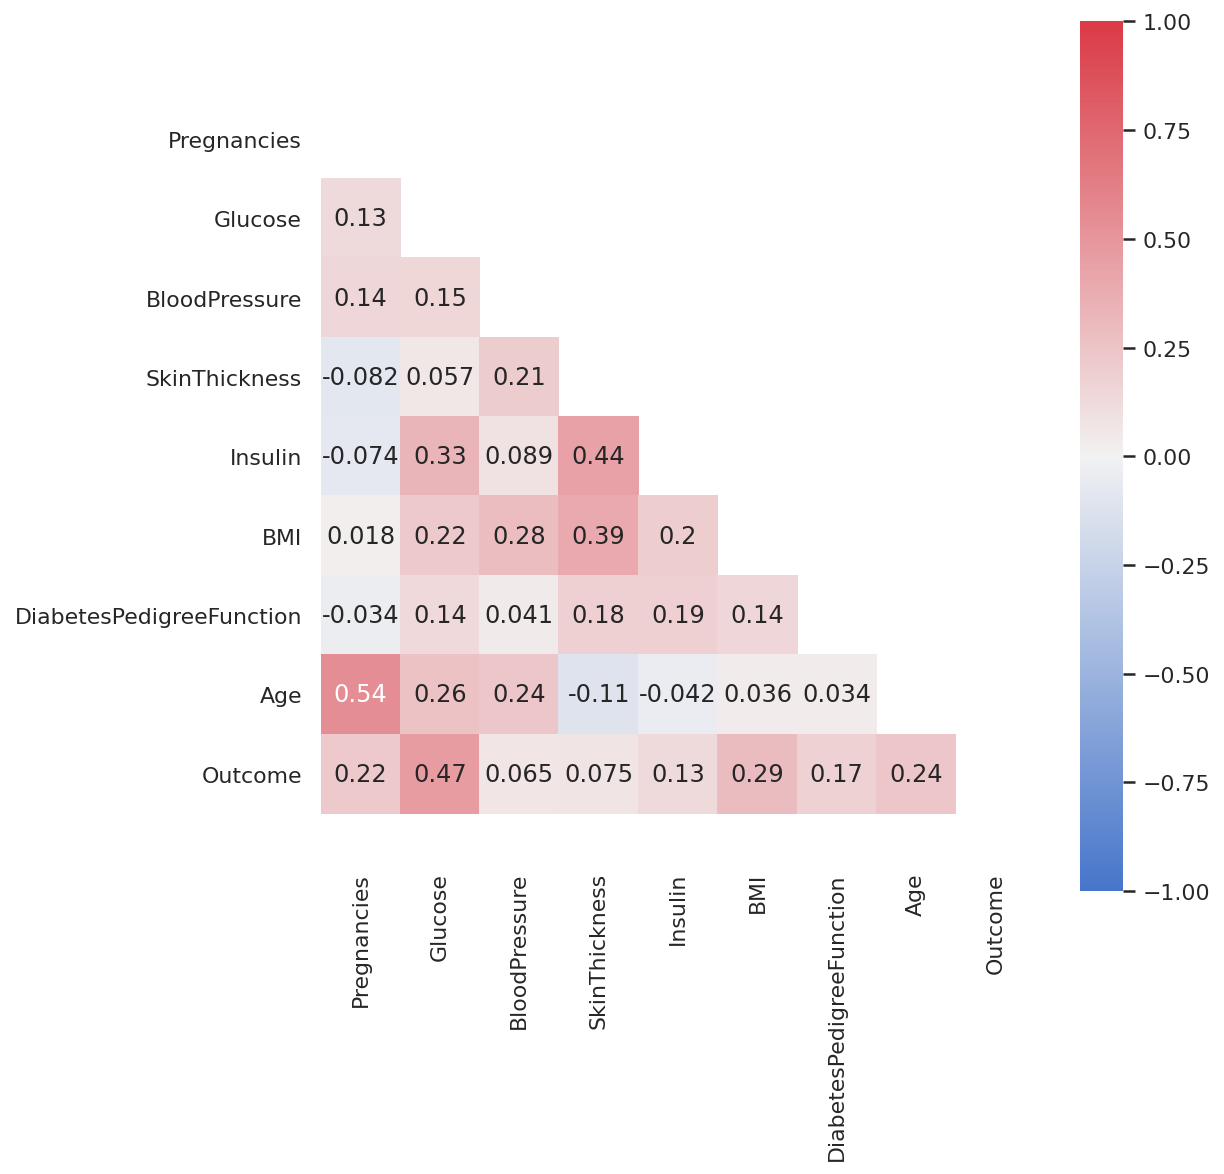

In [ ]:
# Calcule de la matrix de corrélation 
# https://datatofish.com/correlation-matrix-pandas/

correlation_matrix = df.corr()
print(correlation_matrix)

#Visualisation de la matrice de corrélation (Heatmap)
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(8,8))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255
# Plot the heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, square=True, cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

## Machine Learning Scikit-Learn

### Créez un ensemble de données d'entité X et cible y (X et y sont couramment utilisés dans sklearn)

In [ ]:
X, y = df.drop('Outcome', axis=1), df['Outcome']
print(X.shape, y.shape)

# type(X)   # pandas.core.frame.DataFrame
# type(y)   # pandas.core.series.Series

(768, 8) (768,)


### Standardiser les données
Standardiser les donnée en supprimant la moyenne et en mettant à l'échelle la variance unitaire

Le score standard d'un échantillon x est calculé comme suit:

z = (x - u) / s

où u est la moyenne des échantillons d'apprentissage ou zéro si with_mean = False, et s est l'écart type des échantillons d'apprentissage ou un si with_std = False.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X.values)
X_scaled = std.transform(X.values)
print('X_scaled', X_scaled.shape)



X_scaled (768, 8)


1. **Exercice 1 :** Montrer les valeurs obtenues, montrer la distributions des valeurs obtrenues.
2. **Exercice 2 :** Normalizer les variables entre 0 et 1.


In [ ]:

from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X_man_mix = scaler.transform(X)

###  Divisez les données (train et test)



Référence: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:


# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=SEED, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)



X_train (614, 8)
y_train (614,)
X_test (154, 8)
y_test (154,)


**Exercice :** Qu'est-ce que ça veut dire stratify = y?

**Exercice :** Verifier la proportion de positives et de negatives dans le deux jeux de données obtenues. Repeter l'operation sans specifiqué stratify = y


0    0.649351
1    0.350649
Name: Outcome, dtype: float64


([<matplotlib.patches.Wedge at 0x7fa73ff65e10>,
 [Text(-0.49738907892327644, 0.9811238984796237, 'non diabétiques'),
  Text(0.4973890789232768, -0.9811238984796236, 'diabétiques ')],
 [Text(-0.27130313395815076, 0.5351584900797947, '64.9%'),
  Text(0.2713031339581509, -0.5351584900797945, '35.1%')])

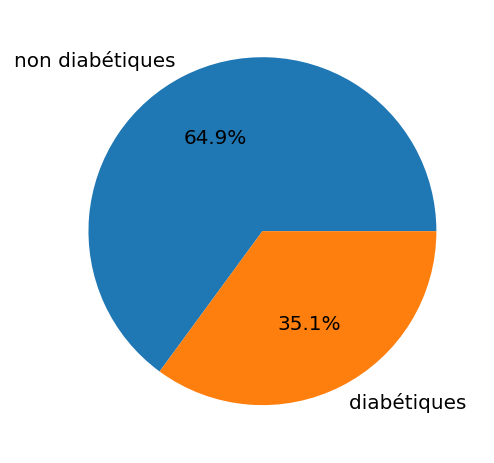

In [ ]:
y_test.head ()
y_test.describe()

proportion = y_test.value_counts() / y_test.count()
print (proportion)

label = ['non diabétiques', 'diabétiques ']

plt.pie(proportion,labels = label,autopct='%1.1f%%')


###Classificateur SVM

In [ ]:
 from sklearn import svm

clf = svm.SVC()
clf.fit(X, y)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


###Évaluation du modèle :
Quels sont les objectifs du modèle ?

Quelles erreurs le modèle peut-il faire ? Et lesquelles sont interdites ?

Exemples : 

1. Une banque qui veut détecter des fraudes voudra un modèle qui n’en laisse passer aucune. Quitte à avoir des suspicions, contacter le client et se tromper.
(Obj Minimiser les faux negatif, tolerance avec les faux positifs)

2. Une messagerie en revanche pourra laisser passer quelques spams mais devra éviter au maximum de classer en tant que spam un mail qui n’en n’est pas un.
(Obj Minimiser les faux positif, tolerance avec les faux negatifs)

3. Un algorithme de reconnaissance de cancer à partir de grains de beauté préférera se tromper et détecter un cancer. Le patient aura donc un examen supplémentaire ou un retrait du grain de beauté. C’est préférable au fait de laisser passer de véritables cancers.
(Obj Minimiser les faux negatif, tolerance avec les faux positifs)

**Question :** Quel est l'objectif de notre classificateur ?


####Matrix de confusion

X dimension Predicted class
Y dimension True class

```markdown
Vrais Negatifs (VN) | 	Faux Positifs (FP)
Faux Negatifs (FN)  |  	Vrais Positifs (VP)
```




[[82 18]
 [21 33]]


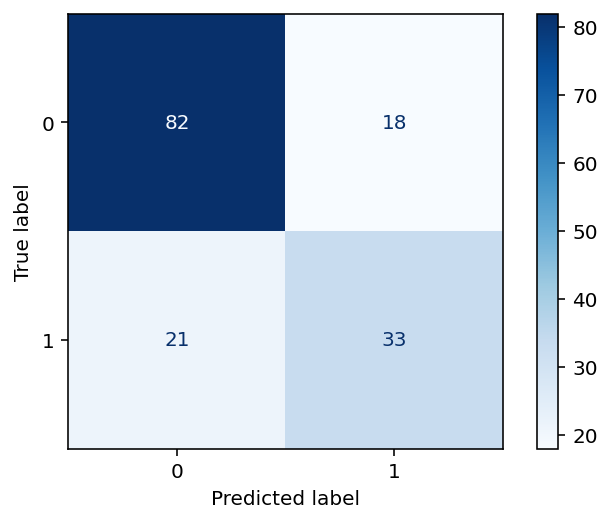

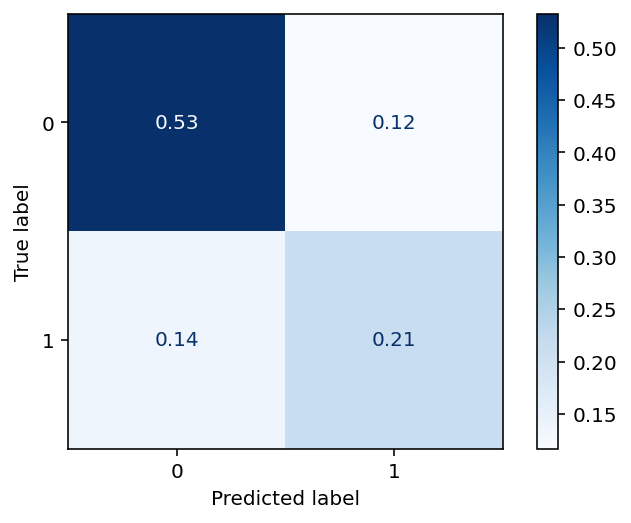

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')  

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize = 'all')  

###Measures de qualité
https://scikit-learn.org/stable/modules/model_evaluation.html

1. **Accuracy :**  Désigne la proportion des prédictions correctes effectuées par le modèle par rapport à toutes les prédictions. Cette métrique n’indique pas les forces et faiblesses de notre modèle, sourtout avec des données inbalanced. 

$Accuracy = \frac{Nombre de prédictions corrrectes} {Nombre total de prédictions}$

$Accuracy = \frac{VP+VN} {VP+VN+FP+FN}$

2. **Precision :** Quelle proportion d'identifications positives était effectivement correcte ?

$Precision = \frac{VP}{VP+FP}$

La précision permet de mesurer le coût des faux positifs, c’est-à-dire ceux détectés par erreur. Si l’on cherche à **limiter les faux positifs**, c’est cet indicateur que l’on va chercher à minimiser.


3. **Recall (Rappel, sensibilité )  :** Quelle proportion de résultats positifs réels a été identifiée correctement ?

$Recall = \frac{VP}{VP+FN}$

Ce calcul permet d’estimer combien de documents réellement positifs nous avons réussi à capturer et combien sont passés au travers des mailles du filet.
Il measure l'impact des faux negatifs


4.  **F1 Score :** Le F1-Score combine subtilement la précision et le rappel. Il est intéressant et plus intéressant que l’accuracy car le nombre de vrais négatifs (VN) n’est pas pris en compte. Et dans les situations d’imbalanced class , comme c'est le cas de cet exemple, nous avons une majorité de vrais négatifs qui faussent complètement notre perception de la performance de l’algorithme. 

$F1-Score = \frac{2 * Precision * Recall}{Precision+Recall}$

**Le F1-Score est donc à privilégier sur l’accuracy dans le cas d’une situation d’imbalanced classes.**

5. **Spécificité :** La spécificité mesure, à l’inverse que la sensibilité, la proportion d’éléments négatifs correctement identifiés.

$Spécificité = \frac{VN}{VN+FP}



In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.7467532467532467

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.7259066319374875, 0.7142857142857143, 0.7181855500821018, None)

####Threshold ou Seuil :##
 Le seuil représente la probabilité à partir de laquelle on considère que l’individu appartient à la class X.

 Imaginons un test pour détecter la grippe. Ce test se base uniquement sur la prise de température. Pour savoir si un individu est malade, on définit un seuil de température au-delà duquel l’individu est considéré malade.
Si seuil=40°C, il y a de fortes chances pour que le test fasse peu, voir aucune erreur en désignant des malades (fp=0). En revanche, il oubliera beaucoup de malades qui peuvent avoir une température de 39,5°C (fn=très élevé).

####Courbe ROC## 

Receiver operating characteristic,  est un graphique représentant les performances d'un modèle de classification pour tous les seuils de classification. Cette courbe trace le taux de vrais positifs en fonction du taux de faux positifs :

Taux de vrais positifs
Taux de faux positifs

Cette courbe sert à deux choses 

1.   **Comparer des modèles :** Il faut se baser sur l’aire sous la courbe (Area Under the Curve). Plus l’aire sous la courbe est grande, meilleur est notre modèle.
2.   **Choisir un seuil optimal :** Le seuil idéal est le meilleur compromis entre sensibilité et spécificité. Correspond au point à la fois le plus proche de l’idéal (1,1) et à la fois le plus loin de la diagonale.







[0.   0.18 1.  ]
[0.         0.61111111 1.        ]
[2 1 0]


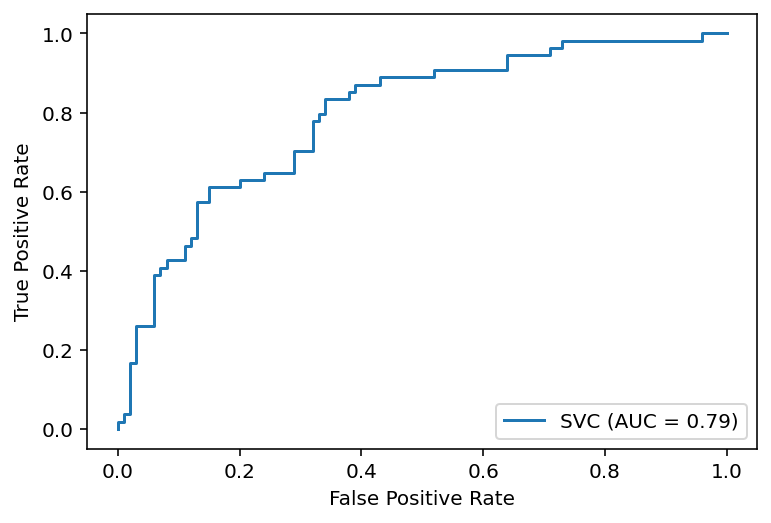

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
print(thresholds)

metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()                                   

##Comment choisir les meilleurs paramètres
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

gamma_vector = np.linspace(1e-4,1e-2,num=10)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': gamma_vector, 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'C': [1, 10, 100, 1000], 'degree' : [2,3,4,5]}]

scores = ['recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(class_weight= 'balanced'), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for recall



NameError: ignored

##Mise en œuvre et comparaison des classificateurs

###Random Forest : 
Repeter l'analyse avec le classificateur Random Forest?

accuracy =  0.7142857142857143


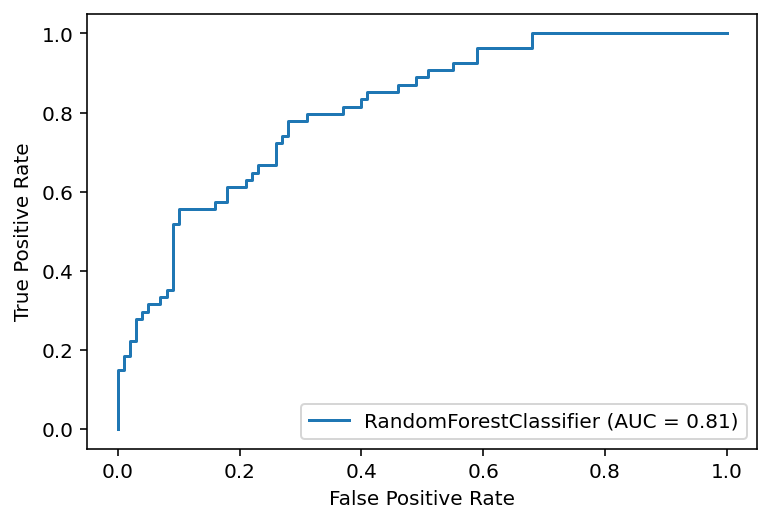

precision_recall_fscore = (0.7259066319374875, 0.7142857142857143, 0.7181855500821018, None)


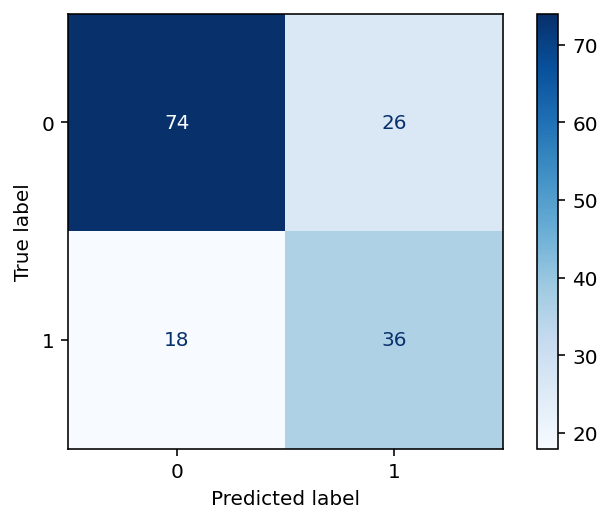

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=SEED, class_weight= 'balanced')
clf.fit(X, y)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy = ',accuracy_score(y_test, y_pred))
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()  

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues') 
print ('precision_recall_fscore =', precision_recall_fscore_support(y_test, y_pred, average='weighted') )




###Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression


param_grid = {'C': [0.01, 0.1, 1, 10, 20]}
grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                    param_grid, cv=5, scoring='f1') # cv=5 refers to cross validation in the training dataset

grid.fit(X_train, y_train)

print("Best cross-validation score: {:.3f}".format(grid.best_score_))   # scoring='f1'; or default using accuracy
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

#make prediction
lr = grid.best_estimator_
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Testing metrics after grid search')
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))

NameError: ignored

###KNN 



accuracy =  0.6883116883116883


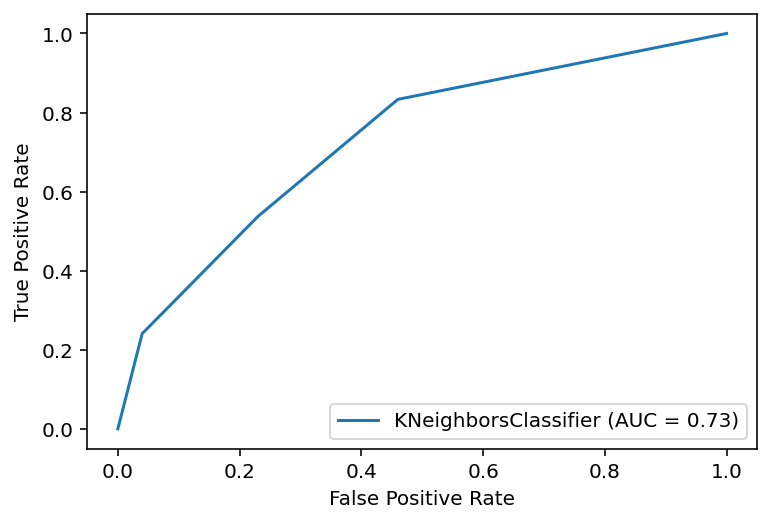

precision_recall_fscore = (0.685750523985818, 0.6883116883116883, 0.6869142439850454, None)


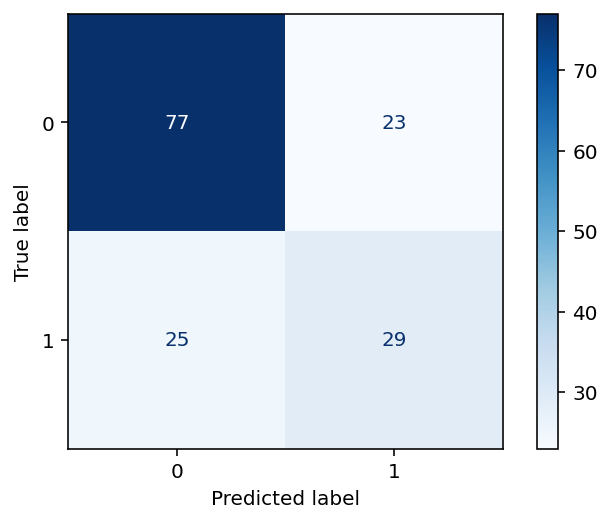

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print('accuracy = ',accuracy_score(y_test, y_pred))
metrics.plot_roc_curve(neigh, X_test, y_test)  
plt.show()  

plot_confusion_matrix(neigh, X_test, y_test, cmap='Blues') 
print ('precision_recall_fscore =', precision_recall_fscore_support(y_test, y_pred, average='weighted') )




In [ ]:
tuned_parameters = [{'n_neighbors': [4,5,6,7,8,9,10],  'algorithm' : ['ball_tree', 'kd_tree', 'brute']}]
   
scores = ['recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        KNeighborsClassifier(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'algorithm': 'ball_tree', 'n_neighbors': 7}

Grid scores on development set:

0.641 (+/-0.062) for {'algorithm': 'ball_tree', 'n_neighbors': 4}
0.690 (+/-0.059) for {'algorithm': 'ball_tree', 'n_neighbors': 5}
0.657 (+/-0.065) for {'algorithm': 'ball_tree', 'n_neighbors': 6}
0.709 (+/-0.046) for {'algorithm': 'ball_tree', 'n_neighbors': 7}
0.680 (+/-0.054) for {'algorithm': 'ball_tree', 'n_neighbors': 8}
0.697 (+/-0.042) for {'algorithm': 'ball_tree', 'n_neighbors': 9}
0.685 (+/-0.024) for {'algorithm': 'ball_tree', 'n_neighbors': 10}
0.641 (+/-0.062) for {'algorithm': 'kd_tree', 'n_neighbors': 4}
0.690 (+/-0.059) for {'algorithm': 'kd_tree', 'n_neighbors': 5}
0.657 (+/-0.065) for {'algorithm': 'kd_tree', 'n_neighbors': 6}
0.709 (+/-0.046) for {'algorithm': 'kd_tree', 'n_neighbors': 7}
0.680 (+/-0.054) for {'algorithm': 'kd_tree', 'n_neighbors': 8}
0.697 (+/-0.042) for {'algorithm': 'kd_tree', 'n_neig

### Appendix: Comment gérer les données de déséquilibrés Oversampling

In [ ]:
# Handling imbalance data - Rerunning above with resampled data - using oversampling
# create fake sample data into the imbalanced side to balance it out.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = SEED)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)


X_train_sm.shape: (802, 8)
1    401
0    401
dtype: int64
Model accuracy is 0.7207792207792207
Model accuracy is 0.7207792207792207
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.60      0.67      0.63        55

   micro avg       0.72      0.72      0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154

[[74 25]
 [18 37]]
